In [10]:
import tensorflow as tf 
import numpy as np

In [11]:
samples_num = 1000
negative_samples = np.random.multivariate_normal(mean=[0,3],cov=[[1,0.5],[0.5,1]],size=samples_num)
positive_samples = np.random.multivariate_normal(mean=[3,0],cov=[[1,0.5],[0.5,1]],size=samples_num)

In [13]:
inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32)

In [15]:
targets = np.vstack((np.ones((samples_num,1),dtype="float32"),np.zeros((samples_num,1),dtype="float32")))

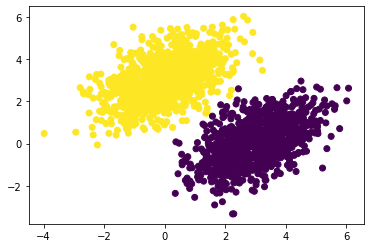

In [16]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0],inputs[:,1],c=targets[:,0])
plt.show()

In [18]:
input_dim = 2
output_dim = 1
w = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim)))
b = tf.Variable(initial_value=tf.random.uniform(shape=(output_dim,)))

In [28]:
def model(inputs):
  return tf.matmul(inputs,w) + b

In [29]:
def square_loss(targets,predictions) :
   per_sample_losses = tf.square(targets-predictions)
   return tf.reduce_mean(per_sample_losses)

In [30]:
learning_rate = 0.1
def training_step(inputs,targets):
    with tf.GradientTape() as tape :
        predictions = model(inputs)
        loss = square_loss(targets,predictions) 
    grad_w,grad_b = tape.gradient(loss,[w,b])
    w.assign_sub(grad_w*learning_rate)
    b.assign_sub(grad_b*learning_rate)
    return loss

In [31]:
for step in range(40):
   loss = training_step(inputs,targets)
   print(f"step:{step} , loss:{loss:.4f}")

step:0 , loss:1.4305
step:1 , loss:0.1601
step:2 , loss:0.0519
step:3 , loss:0.0346
step:4 , loss:0.0315
step:5 , loss:0.0306
step:6 , loss:0.0301
step:7 , loss:0.0296
step:8 , loss:0.0293
step:9 , loss:0.0289
step:10 , loss:0.0286
step:11 , loss:0.0283
step:12 , loss:0.0281
step:13 , loss:0.0278
step:14 , loss:0.0276
step:15 , loss:0.0274
step:16 , loss:0.0272
step:17 , loss:0.0271
step:18 , loss:0.0269
step:19 , loss:0.0268
step:20 , loss:0.0267
step:21 , loss:0.0265
step:22 , loss:0.0264
step:23 , loss:0.0263
step:24 , loss:0.0262
step:25 , loss:0.0262
step:26 , loss:0.0261
step:27 , loss:0.0260
step:28 , loss:0.0260
step:29 , loss:0.0259
step:30 , loss:0.0259
step:31 , loss:0.0258
step:32 , loss:0.0258
step:33 , loss:0.0257
step:34 , loss:0.0257
step:35 , loss:0.0257
step:36 , loss:0.0256
step:37 , loss:0.0256
step:38 , loss:0.0256
step:39 , loss:0.0256


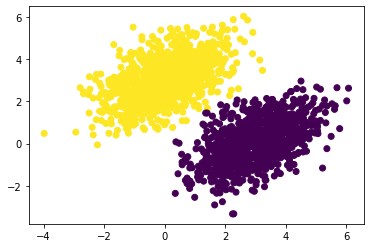

In [35]:
predictions = model(inputs)
plt.scatter(inputs[:,0],inputs[:,1],c=predictions[:]>0.5)

In [37]:
print(predictions)

tf.Tensor(
[[ 0.92398226]
 [ 0.93285346]
 [ 0.8490586 ]
 ...
 [ 0.25438067]
 [ 0.1922108 ]
 [-0.10901275]], shape=(2000, 1), dtype=float32)


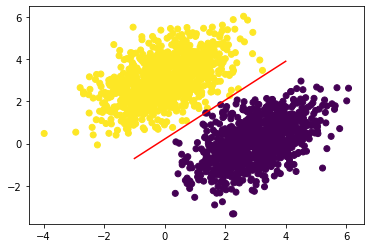

In [39]:
x = np.linspace(-1, 4, 100) 
y = - w[0] / w[1] * x + (0.5 - b) / w[1]
plt.plot(x, y, "-r") 
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)